task 1

In [15]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16, InceptionV3
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [16]:

vgg_model = VGG16(weights='imagenet', include_top=True)
inception_model = InceptionV3(weights='imagenet', include_top=True)


96112376/96112376 [==============================] - 1s 0us/step


In [17]:
def preprocess_image(image_path, model_name):
    img = load_img(image_path, target_size=(224, 224))  # Adjust target size according to the model
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    if model_name == 'VGG16':
        processed_img = vgg_preprocess(img_array)
    elif model_name == 'Inception':
        processed_img = inception_preprocess(img_array)
    else:
        raise ValueError("Invalid model name")

    return processed_img


In [20]:
from tensorflow.keras.applications.vgg16 import decode_predictions as vgg_decode_predictions


processed_image_vgg = preprocess_image(image_path, 'VGG16')
predictions_vgg = vgg_model.predict(processed_image_vgg)
decoded_predictions_vgg = vgg_decode_predictions(predictions_vgg)
predicted_class_name_vgg = decoded_predictions_vgg[0][0][1]
print("VGG16 Predicted Class:", predicted_class_name_vgg)



1/1 [==============================] - 1s 539ms/step
VGG16 Predicted Class: airliner


task 2

In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import EfficientNetB0, ResNet50
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


170498071/170498071 [==============================] - 2s 0us/step


In [2]:
effnet_model = EfficientNetB0(weights='imagenet', include_top=True)
resnet_model = ResNet50(weights='imagenet', include_top=True)
def preprocess_image(image_path, model_name):
    img = load_img(image_path, target_size=(224, 224))  # Adjust target size according to the model
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    if model_name == 'EfficientNet':
        processed_img = efficientnet_preprocess(img_array)
    elif model_name == 'ResNet50':
        processed_img = resnet_preprocess(img_array)
    else:
        raise ValueError("Invalid model name")

    return processed_img


102967424/102967424 [==============================] - 1s 0us/step


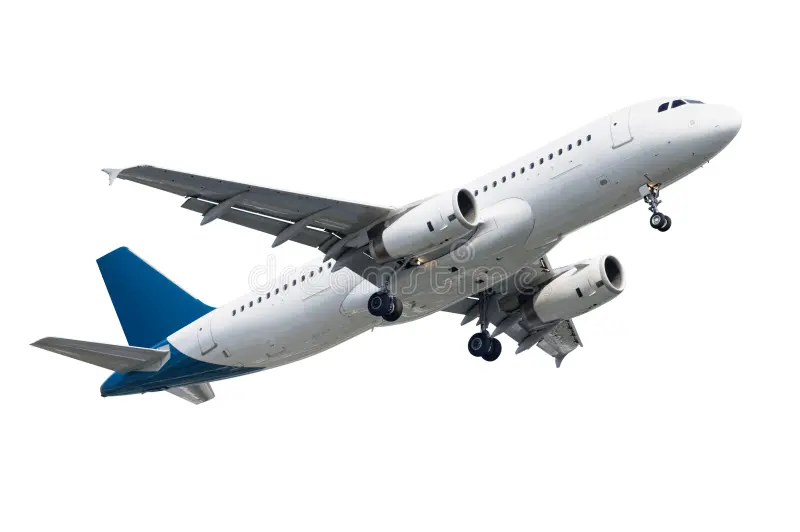

In [11]:
#actual image
import cv2
from google.colab.patches import cv2_imshow
pic=cv2.imread("/content/airplane.webp")
cv2_imshow(pic)

In [12]:
from tensorflow.keras.applications.resnet50 import decode_predictions
image_path="/content/airplane.webp"
processed_image_resnet = preprocess_image(image_path, 'ResNet50')
predictions_resnet = resnet_model.predict(processed_image_resnet)
decoded_predictions_resnet = decode_predictions(predictions_resnet)
predicted_class_name_resnet = decoded_predictions_resnet[0][0][1]
print("ResNet50 Predicted Class:", predicted_class_name_resnet)

1/1 [==============================] - 0s 178ms/step
ResNet50 Predicted Class: airliner


In [13]:
from tensorflow.keras.applications.efficientnet import decode_predictions as efficientnet_decode_predictions

processed_image_effnet = preprocess_image(image_path, 'EfficientNet')
predictions_effnet = effnet_model.predict(processed_image_effnet)
decoded_predictions_effnet = efficientnet_decode_predictions(predictions_effnet)
predicted_class_name_effnet = decoded_predictions_effnet[0][0][1]
print("EfficientNet Predicted Class:", predicted_class_name_effnet)


1/1 [==============================] - 0s 111ms/step
EfficientNet Predicted Class: airliner
